In [1]:
#import libra
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import the dataset 
dataset = pd.read_csv("covid19_deaths_dataset.csv")
dataset.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [3]:
dataset.shape

(266, 104)

In [4]:
#delete use less columns
df= dataset.drop(["Lat","Long"],axis=1,inplace=True)

In [5]:
#aggregate the row by the country
corona_dataset_aggregated=dataset.groupby("Country/Region").sum()

In [6]:
corona_dataset_aggregated.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [7]:
corona_dataset_aggregated.shape

(187, 101)

In [8]:
#visualize data related to country
corona_dataset_aggregated.loc["China"]

Province/State    AnhuiBeijingChongqingFujianGansuGuangdongGuang...
1/22/20                                                          17
1/23/20                                                          18
1/24/20                                                          26
1/25/20                                                          42
                                        ...                        
4/26/20                                                        4637
4/27/20                                                        4637
4/28/20                                                        4637
4/29/20                                                        4637
4/30/20                                                        4637
Name: China, Length: 101, dtype: object

In [9]:
corona_dataset_aggregated = corona_dataset_aggregated.apply(pd.to_numeric, errors='coerce')

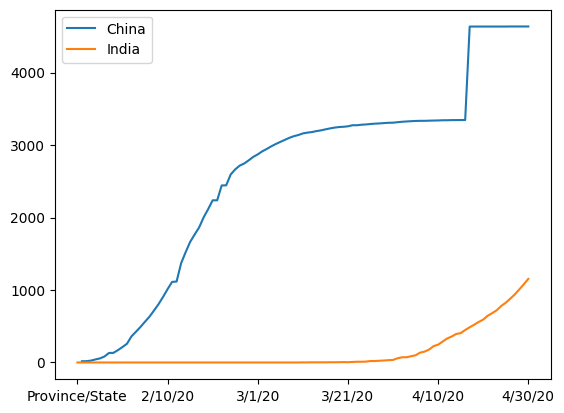

In [10]:
#visualize data related to country
corona_dataset_aggregated.loc["China"].plot()
corona_dataset_aggregated.loc["India"].plot()
plt.legend()

<Axes: >

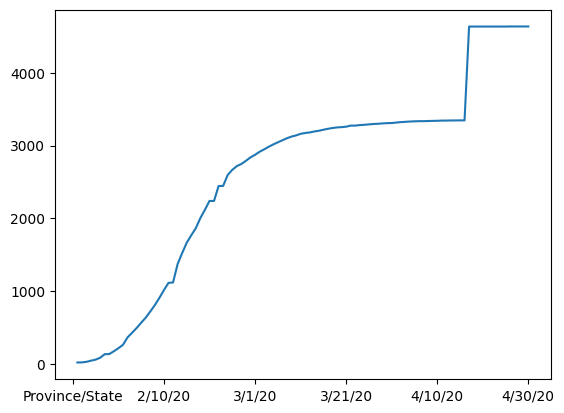

In [11]:
#calculated a good meassure
corona_dataset_aggregated.loc["China"].plot()

In [12]:
#calculate the first derivative of the curve
corona_dataset_aggregated.loc["China"].diff()

Province/State     NaN
1/22/20            NaN
1/23/20            1.0
1/24/20            8.0
1/25/20           16.0
                  ... 
4/26/20            1.0
4/27/20            0.0
4/28/20            0.0
4/29/20            0.0
4/30/20            0.0
Name: China, Length: 101, dtype: float64

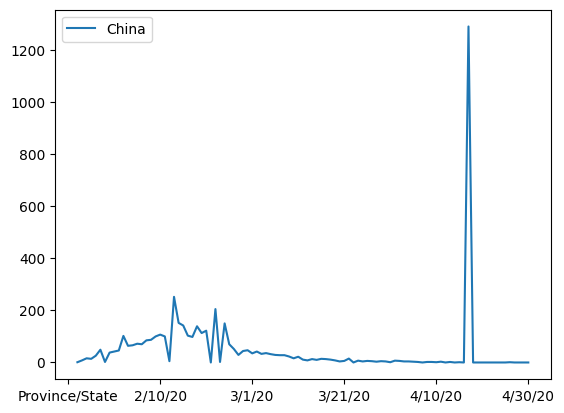

In [13]:
corona_dataset_aggregated.loc["China"].diff().plot()
plt.legend()

In [14]:
#maximum infection rate
corona_dataset_aggregated.loc["China"].diff().max()

1290.0

In [15]:
#all countries
countries=list(corona_dataset_aggregated.index)
max_infection=[]
for c in countries:
    max_infection.append(corona_dataset_aggregated.loc[c].diff().max())
corona_dataset_aggregated["Max_Infesction_Rate"]= max_infection   

In [16]:
max_infection

[7.0,
 4.0,
 30.0,
 4.0,
 2.0,
 1.0,
 13.0,
 3.0,
 8.0,
 30.0,
 3.0,
 3.0,
 1.0,
 15.0,
 1.0,
 5.0,
 496.0,
 1.0,
 1.0,
 0.0,
 6.0,
 6.0,
 1.0,
 493.0,
 1.0,
 6.0,
 4.0,
 2.0,
 1.0,
 1.0,
 0.0,
 20.0,
 251.0,
 0.0,
 3.0,
 13.0,
 1290.0,
 26.0,
 0.0,
 3.0,
 5.0,
 1.0,
 4.0,
 8.0,
 6.0,
 2.0,
 18.0,
 22.0,
 2.0,
 1.0,
 0.0,
 38.0,
 208.0,
 22.0,
 1.0,
 1.0,
 0.0,
 6.0,
 1.0,
 2.0,
 0.0,
 43.0,
 1440.0,
 1.0,
 1.0,
 1.0,
 510.0,
 5.0,
 10.0,
 0.0,
 3.0,
 2.0,
 1.0,
 2.0,
 2.0,
 0.0,
 8.0,
 23.0,
 5.0,
 75.0,
 60.0,
 158.0,
 7.0,
 220.0,
 13.0,
 919.0,
 2.0,
 47.0,
 2.0,
 5.0,
 2.0,
 11.0,
 10.0,
 4.0,
 3.0,
 0.0,
 4.0,
 2.0,
 4.0,
 1.0,
 1.0,
 6.0,
 8.0,
 2.0,
 0.0,
 1.0,
 8.0,
 1.0,
 4.0,
 1.0,
 1.0,
 2.0,
 163.0,
 10.0,
 2.0,
 0.0,
 1.0,
 12.0,
 0.0,
 0.0,
 0.0,
 234.0,
 4.0,
 1.0,
 4.0,
 7.0,
 6.0,
 16.0,
 2.0,
 42.0,
 11.0,
 0.0,
 2.0,
 108.0,
 50.0,
 40.0,
 37.0,
 2.0,
 34.0,
 105.0,
 0.0,
 0.0,
 0.0,
 0.0,
 6.0,
 0.0,
 9.0,
 2.0,
 54.0,
 0.0,
 3.0,
 2.0,
 4.0,
 6.0,
 8.0,
 14.0,
 0.

In [17]:
corona_dataset_aggregated

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,Max_Infesction_Rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0.0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0.0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0.0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0.0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0.0,0,0,0,0,0,0,0,0,0,...,4,4,4,2,2,2,2,2,2,1.0
Western Sahara,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
Yemen,0.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2.0


In [18]:
#new dataframe
corona_data = pd.DataFrame(corona_dataset_aggregated["Max_Infesction_Rate"])

In [19]:
corona_data

,Max_Infesction_Rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0
...,...
West Bank and Gaza,1.0
Western Sahara,0.0
Yemen,2.0


In [20]:
#import the happiness report
happiness_report= pd.read_csv("worldwide_happiness_report.csv")
happiness_report

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [21]:
#drop use less columns
useless_cols=["Overall rank","Score","Generosity","Perceptions of corruption"]

In [22]:
happiness_report.drop(useless_cols,axis=1,inplace=True)

In [23]:
happiness_report

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...,...
151,Rwanda,0.359,0.711,0.614,0.555
152,Tanzania,0.476,0.885,0.499,0.417
153,Afghanistan,0.350,0.517,0.361,0.000
154,Central African Republic,0.026,0.000,0.105,0.225


In [24]:
happiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


In [25]:
happiness_report.set_index("Country or region",inplace=True)
happiness_report.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


In [26]:
#join dataset
corona_data.shape

(187, 1)

In [27]:
happiness_report.shape

(156, 4)

In [28]:
df=corona_data.join(happiness_report,how="inner")

In [29]:
df

,Max_Infesction_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,7.0,0.350,0.517,0.361,0.000
Albania,4.0,0.947,0.848,0.874,0.383
Algeria,30.0,1.002,1.160,0.785,0.086
Argentina,13.0,1.092,1.432,0.881,0.471
Armenia,3.0,0.850,1.055,0.815,0.283
...,...,...,...,...,...
Venezuela,6.0,0.960,1.427,0.805,0.154
Vietnam,0.0,0.741,1.346,0.851,0.543
Yemen,2.0,0.287,1.163,0.463,0.143
Zambia,1.0,0.578,1.058,0.426,0.431


In [30]:
df.corr()

,Max_Infesction_Rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_Infesction_Rate,1.000000,0.259893,0.204148,0.309666,0.080166
GDP per capita,0.259893,1.000000,0.759468,0.863062,0.394603
Social support,0.204148,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.309666,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.080166,0.394603,0.456246,0.427892,1.000000


<Axes: xlabel='GDP per capita', ylabel='Max_Infesction_Rate'>

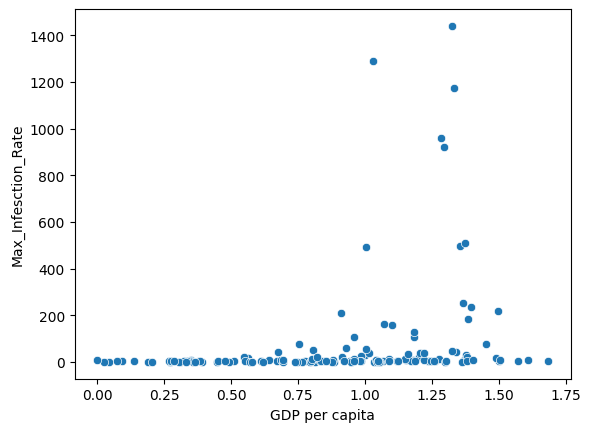

In [31]:
#visualization
x = df["GDP per capita"]
y=df["Max_Infesction_Rate"]
sns.scatterplot(x=x,y=y)

C:\Users\Puja Kurde\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='GDP per capita', ylabel='Max_Infesction_Rate'>

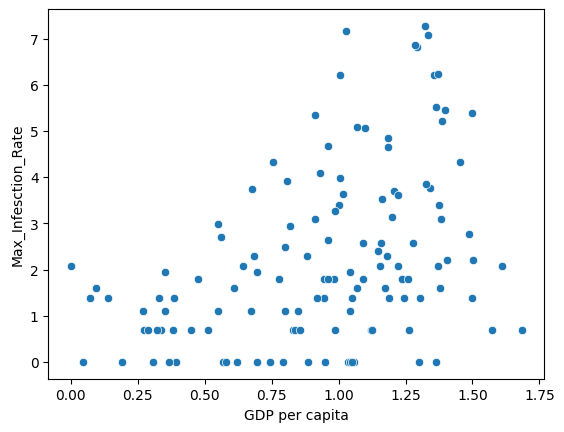

In [32]:
sns.scatterplot(x=x,y=np.log(y))  #logscaling

C:\Users\Puja Kurde\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Puja Kurde\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\nanfunctions.py:1583: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


<Axes: xlabel='GDP per capita', ylabel='Max_Infesction_Rate'>

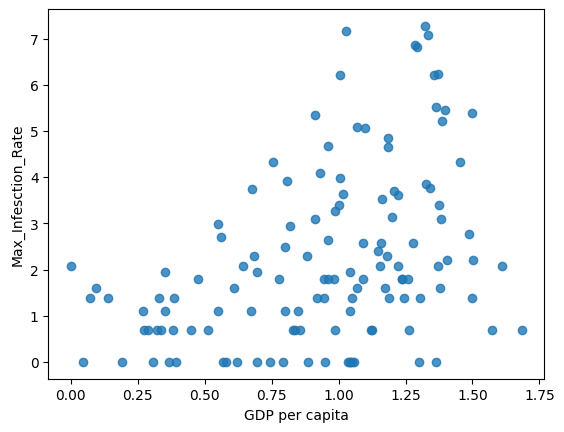

In [33]:
sns.regplot(x=x,y=np.log(y))

In [ ]:
sns.regplot(x=x,y=np.log(y))